In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

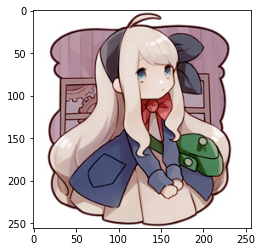

In [19]:
img = cv2.imread('aicon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

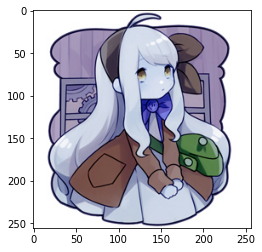

In [8]:
#Q.1: Channel Swapping
bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(bgr_img)

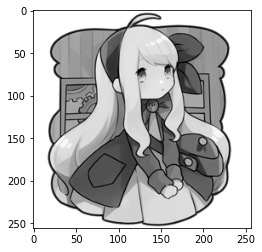

In [10]:
#Q.2: Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

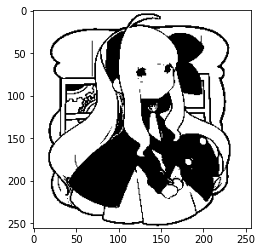

In [27]:
#Q.3: Binarization

th, bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(bin_img, cmap='gray')

169.0


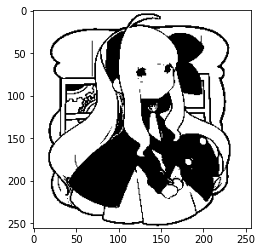

In [28]:
#Q.4: Binarization of Otsu

th, binOtsu_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_OTSU)

print(th)

plt.imshow(bin_img, cmap='gray')

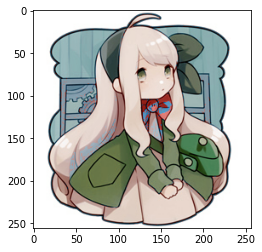

In [24]:
#Q.5: HSV Conversion

hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv_img[:,:,0] += 180
hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

plt.imshow(hsv_img)

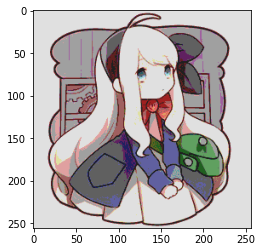

In [8]:
#Q.6: Discretization of Color
discr_img = img

discr_img = np.where((discr_img >= 0)&(discr_img < 63), 32, discr_img)
discr_img = np.where((discr_img >= 63)&(discr_img < 127), 96, discr_img)
discr_img = np.where((discr_img >= 127)&(discr_img < 191), 160, discr_img)
discr_img = np.where((discr_img >= 191)&(discr_img < 256), 224, discr_img)

plt.imshow(discr_img)

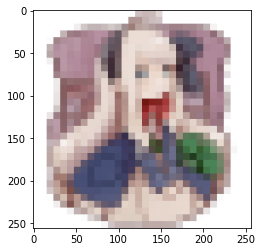

In [17]:
#Q.7: Average Pooling
def average_pool(kernel, num):
    for i in range(3):
        np.put(kernel[:,:,i], range(num*num), np.average(kernel[:,:,i]))
    return kernel

n = 8
average_pool_img = img

for x in range(len(img[0,:])//n):
    for y in range(len(img[:,0])//n):
        average_pool_img[y*n:(y+1)*n,x*n:(x+1)*n] = average_pool(average_pool_img[y*n:(y+1)*n,x*n:(x+1)*n], n)

plt.imshow(average_pool_img)


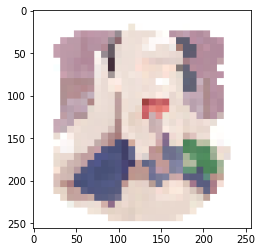

In [20]:
#Q.8: Max Pooling
def max_pool(kernel, num):
    for i in range(3):
        np.put(kernel[:,:,i], range(num*num), np.max(kernel[:,:,i]))
    return kernel

n = 8
max_pool_img = img

for x in range(len(img[0,:])//n):
    for y in range(len(img[:,0])//n):
        max_pool_img[y*n:(y+1)*n,x*n:(x+1)*n] = max_pool(max_pool_img[y*n:(y+1)*n,x*n:(x+1)*n], n)

plt.imshow(max_pool_img)


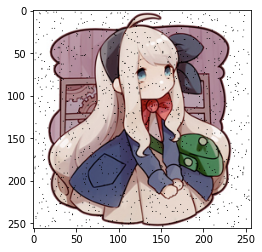

In [3]:
# make noise image
noise_img = img
h, w, c = noise_img.shape

n_h = np.random.randint(0,h-1,1024)
n_w = np.random.randint(0,w-1,1024)
noise_img[(n_h),(n_w)] = (0,0,0)

plt.imshow(noise_img)

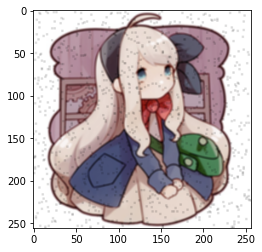

In [4]:
#Q.9: Gaussian Filter

gaus_img = cv2.GaussianBlur(noise_img, (3,3), 1.3)

plt.imshow(gaus_img)

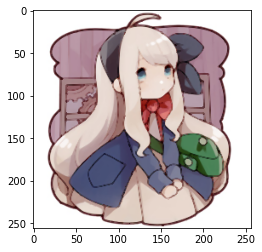

In [5]:
#Q.10: Median Filter

median_img = cv2.medianBlur(noise_img,3)

plt.imshow(median_img)